# Best Fit Slope and Intercept

In [34]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

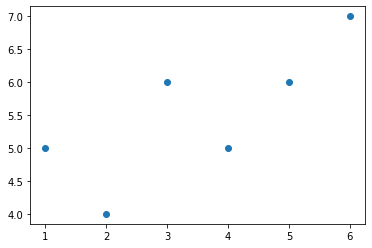

In [3]:
plt.scatter(xs, ys)
plt.show()

In [4]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( ( (mean(xs) * mean(ys)) - (mean(xs*ys)) ) / ( (mean(xs)**2) - (mean(xs**2)) ) )
    c = mean(ys) - m * mean(xs)
    return m, c

In [6]:
slope, intercept = best_fit_slope_and_intercept(xs, ys)

In [7]:
print(slope)

0.42857142857142866


In [8]:
print(intercept)

4.0


In [10]:
regression_line = [(slope*x)+intercept for x in xs]

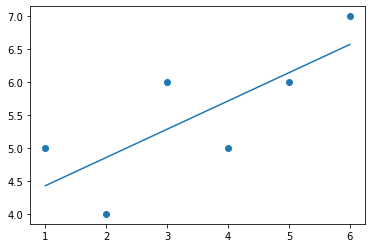

In [13]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

In [18]:
predict_x = 5.5
predict_y = slope*predict_x + intercept

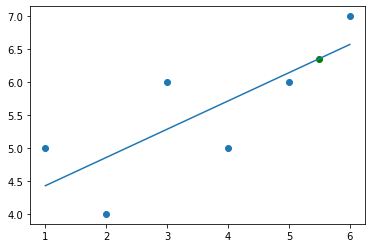

In [19]:
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color = 'g')
plt.plot(xs, regression_line)
plt.show()

# R square

In [21]:
#calculate squared error
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

In [24]:
#calculate coeffecient of determination
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [25]:
r_squared = coefficient_of_determination(ys, regression_line)

In [26]:
print(r_squared)

0.5844155844155845


# Testing assumption

In [38]:
#creating the dataset
def create_dataset(hm, variance, step=2, coorelation= False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if coorelation and coorelation == 'pos' :
            val+=step
        elif coorelation and coorelation  == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


In [69]:
xs, ys = create_dataset(40, 40, 2, coorelation='pos')

In [70]:
slope, intercept = best_fit_slope_and_intercept(xs, ys)

In [71]:
regression_line = [(slope*x)+intercept for x in xs]

In [72]:
predict_x = 5.5
predict_y = slope*predict_x + intercept

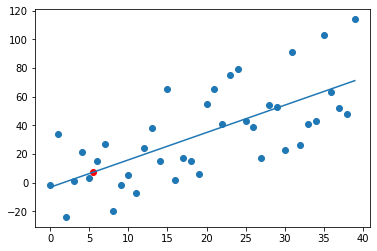

In [73]:
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color = 'r')
plt.plot(xs, regression_line)
plt.show()